# Homework 6 - Andrea Lazzari

### Analysis Consumer Resource Model with biotic resources

Consider a consumer resource model with supply rate is 
$$s(c) = w \cdot c \cdot \bigg(1 – \dfrac{c}{K} \bigg) $$ 
and resource concentration $r(c) = c$ is linear for $S=5$ species and $R=5$ resources.

 Assign the metabolic strategies at random from a Uniform Distribution between $[0, 0.2]$, while set all other parameters to $1$ and choose the death rate small enough as you prefer.

1. Perform the simulations of the full CRM model and compare the stationary solution you find numerically with those obtained analytically.

2. Set $w=10$ and do the simulation of the Quasi Stationary Approximation (finding first $c*$ and then simulating $n(t,c*)$) and compare it with the simulations of the full CRM (keeping fix the metabolic strategies in the two cases for a given realization). 

Do several (e.g. $>20$) realizations of the dynamics to obtain a statistics of the species population stationary states in the two cases, represent each population through a Box-Whisker Plot both for the full CRM and the GLV and compare the two.

3. Does the quasi-stationary approximation work if if $w=0.1$? Why?

---

# Consumer and Resource Models

### Biotic resources

We want to analyze a more general case, the *MacArthur's Consumer Resource Model* with biotic resources.
Having $m$ species and $p$ resources, the model is the following:
$$
\begin{cases}

\dfrac{dn_{\sigma}}{dt} =  n_{\sigma} \cdot \bigg( \sum_{i=1}^{p}  v_i \cdot \alpha_{\sigma_i} \cdot r_i(c_i) - \delta_{\sigma} \bigg)  \quad \quad \sigma = 1, \dots, m \\
\\
\dfrac{dc_{i}}{dt} =  s_i - \sum_{\sigma = 1}^{m} n_{\sigma} \cdot \alpha_{\sigma_i} \cdot r_i(c_i)  \quad \quad \quad i = 1, \dots, p

\end{cases}
$$

The first equation represents the Consumer dynamic:

* $n_{\sigma}$ is the number of individuals of the $\sigma$-th species
* $v_i$ is the efficiency of the conversion of resource $i$ into biomass of species $\sigma$
* $\alpha_{\sigma_i}$ is the assimilation efficiency of the $\sigma$-th species, is also called **metabolic strategy** of $\sigma$
   - if $\alpha_{\sigma_i} > 0$ the species $\sigma$ is a consumer of resource $i$
* $\delta_{\sigma}$ is the death rate of the $\sigma$-th species


---

The second equation is instead representative of the Resources dynamic:

* $s_i$ is called supply rate and it is the maximum growth rate of the $i$-th resource
* $c_i$ is the concentration of the $i$-th resource
* $r_i(c_i)$ is the resource consumption rate of the $\sigma$-th species given by the *Monod function*:

$$r_i(c_i) = \dfrac{c_i}{c_i + K_i}$$

where $K_i$ is the half saturation constant of the $\sigma$-th species.

---

We study the case where resources are biotic and the  supply rate is given by the following expression:

$$ s(c_i) = \omega \cdot  c_i \cdot \bigg( 1 - \frac{c_i}{K_i} \bigg) $$

In addition, we assume to have a linear resource concentration $r_i(c_i) = c_i$.

As a starting point we consider the case of $S=5$ species and $R=5$ resources, assigning the metabolic strategies at random from a Uniform Distribution between $[0, 0.2]$ and all other parameters to $1$ apart from the death rate $\delta_{\sigma}$ which is set, qually for all the species, to $0.01$.


---

### Stationary solution

We want to find the stationary solution of the system, that is the solution of the system when the two time derivatives are equal to zero. We start from the first equation, excluding the case of $n_{\sigma} = 0$:

$$ 
\dfrac{dn_{\sigma}}{dt} = 0 \quad \to \quad  \sum_{i=1}^{p}  v_i \cdot \alpha_{\sigma_i} \cdot r_i(c_i^*) - \delta_{\sigma} = 0
$$

with our assumptions regarding $v_i$ and $r_i(c_i)$ we have:

$$
\sum_{i=1}^{p}  \alpha_{\sigma_i} \cdot c_i^* - \delta_{\sigma} = 0
$$

Calling $A$ the matrix of the metabolic strategies we obtain:

$$
A \cdot \vec{c_i^*} - \delta \cdot \vec{1_{\sigma}} = 0  \quad \quad \text{with } \quad \vec{1_{\sigma}} \text{ is the column vector of dimension } m \text{ with all entries equal to } 1
$$

That leads to:

$$
\boxed{ \vec{c_i^*} = A^{-1} \cdot \delta \cdot \vec{1_{\sigma}} }
$$

Considering the second equation we have:

$$
\dfrac{dc_i}{dt} = 0 \quad \to \quad s_i - \sum_{\sigma = 1}^{m} n^*_{\sigma} \cdot \alpha_{\sigma_i} \cdot r_i(c_i^*) = 0
$$

This relation in our case becomes:

$$
\cancel{c_i^*} \cdot (1 - c^*_i) - \sum_{\sigma = 1}^{m} n^*_{\sigma} \cdot \alpha_{\sigma_i} \cdot \cancel{c_i^*} = 0
$$

Renaming $(1 - c^*_i)$ as $\vec{\mu_i^*}$, in a vector notation we obtain:

$$
\vec{\mu_i^*} = \vec{n^*_{\sigma}} \cdot A   \quad  \to \quad \boxed{ \vec{n^*_{\sigma}} = \vec{\mu_i^*} \cdot A^{-1} }
$$


---

### Simulation of the full CRM

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd 
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib

from scipy.integrate import odeint


In [2]:
np.random.seed(2045247)  #2045671

m = 5     #number of species
p = 5     #number of resources

death_rate = 1/100
omega = 1

In [3]:
id_mat = np.eye(m, p)
np.random.shuffle(id_mat)
metabolic_strategies = id_mat * np.random.uniform(0, 0.2, size = (m, p))   #matrix A

death_rate_vec = np.ones(m) * death_rate

print('Matrix of the Metabolic startegies :\n')
display(metabolic_strategies)

print('Death rate vector:')
display(death_rate_vec)




Matrix of the Metabolic startegies :



array([[0.        , 0.        , 0.        , 0.08974091, 0.        ],
       [0.        , 0.1002059 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.13908624],
       [0.08939381, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.09800808, 0.        , 0.        ]])

Death rate vector:


array([0.01, 0.01, 0.01, 0.01, 0.01])

In [4]:
inverse_A = np.linalg.inv(metabolic_strategies)     #matrix A inverse

c_stat = inverse_A @ death_rate_vec     #vector c*

c_stat 

array([0.11186456, 0.09979453, 0.10203241, 0.1114319 , 0.07189784])

In [5]:
mu_stat = np.ones(m) - c_stat     #vector mu* = (1-c*)

n_stat = mu_stat @ inverse_A     #vector n*

n_stat

array([9.90148353, 8.98355794, 6.67285388, 9.93508837, 9.16217952])

In [6]:
n0 = list(np.abs(stats.norm.rvs(loc = 7, scale = 1, size = m)))
c0 = list(np.abs(stats.norm.rvs(loc = 7, scale = 1, size = p)))


def system(y, t, m, p, alpha, delta, omega):
    return_list = []
    n_vec = np.array(y[:m])
    c_vec = np.array(y[m:])
    
    omega_vec = np.ones(m) * omega
    
    for i in range(m):
        n = y[i]
        dn_dt = n * ( np.sum(alpha[i, :] * c_vec) - delta)
        return_list.append(dn_dt)

    for j in range(p):
        
        c = y[m + j]
        s_i = omega_vec[j] * c * (1 - c)
        dc_dt = s_i - (np.sum(n_vec * alpha[:, j] * c))
        return_list.append(dc_dt)
    
    return return_list

t = np.linspace(0, 200, 300)   # time_domain

y0 = n0 + c0   # initial conditions

solution = odeint(system, y0, t, args=(m, p, metabolic_strategies, death_rate, omega))


In [7]:
arr = np.vstack((t, np.array(solution).T)).T

df = pd.DataFrame(arr, columns = ['t[s]', 'Consumer_n1', 'Consumer_n2', 'Consumer_n3', 'Consumer_n4','Consumer_n5',
                                  'Resource_c1', 'Resource_c2', 'Resource_c3', 'Resource_c4', 'Resource_c5']) 


df_spec = pd.DataFrame(n_stat, columns=['Stationary_Solutions'])

df_res = pd.DataFrame(c_stat, columns=['Stationary_Solutions'])

In [8]:

fig = px.line(df , x='t[s]', title="Consumer Resource Model - Biotic - with 5 species and 5 Resources <br><sup>Species Evolution w.r.t. Stationary Solutions ---</sup>",
              y=['t[s]', 'Consumer_n1', 'Consumer_n2', 'Consumer_n3', 'Consumer_n4','Consumer_n5',],
              labels={'value':'Dynamics', 'variable':'', 't[s]':'t [s]'},
              height=600, width=1200)



for i in range (1,6):
      fig.update_traces(selector = {'name': f'Consumer_n{i}'}, line = {'width':3.5})
      fig.add_hline(df_spec['Stationary_Solutions'][i-1], line_width=2, line_dash="dash", line_color="black")

fig.update_layout(font=dict(size=20))
fig.show()

In [9]:
fig = px.line(df , x='t[s]', title="Consumer Resource Model - Biotic - with 5 species and 5 Resources <br><sup>Resources Evolution w.r.t. Stationary Solutions ---</sup>",
              y=['t[s]', 'Resource_c1', 'Resource_c2', 'Resource_c3', 'Resource_c4','Resource_c5',],
              labels={'value':'Dynamics', 'variable':'', 't[s]':'t [s]'},
              height=600, width=1200)

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Resource_c{i}'}, line = {'width':3.5})
      fig.add_hline(df_res['Stationary_Solutions'][i-1], line_width=2, line_dash="dash", line_color="black")

fig.update_layout(font=dict(size=20), yaxis_range = [-0.05, 0.4])
fig.show()

### Quasi Stationary Approximation

In this part of the analysis we want to study the **Quasi Stationary Approximation** of the CRM, that is the approximation of the full CRM when the time scale of the resources dynamics is much larger than the time scale of the species dynamics.
In this evolution when the population changes, the resource will reach a new equilibrium before the next change of the population.

This can be done by considering the following approximation:

$$
\dfrac{dc_{i}}{dt} = 0 \quad \to \quad c_i = c_i^*
$$

For the population dynamics, we consider the full equation with the assumptions used above:

$$
\dfrac{dn_{\sigma}}{dt} =  n_{\sigma} \cdot \bigg( \sum_{i=1}^{p} \alpha_{\sigma_i} \cdot c_i^* - \delta_{\sigma} \bigg)  \quad \quad \sigma = 1, \dots, m \\
$$

Here we fixed the parameter $\omega = 10 \cdot \vec{1_{i}}$ for all the resources; we have:

$$
\omega \cdot \cancel{c_i^*} \cdot (1 - c^*_i) - \sum_{\sigma = 1}^{m} n_{\sigma} \cdot \alpha_{\sigma_i} \cdot \cancel{c_i^*} = 0
\quad \to \quad c_i^* = 1 - \dfrac{\sum_{\sigma = 1}^{m} n_{\sigma} \cdot \alpha_{\sigma_i}}{\omega}
$$

Substituting back this last expression in the species dynamics we obtain:

$$
\boxed{
\dfrac{dn_{\sigma}}{dt} =  n_{\sigma} \cdot \bigg[ \sum_{i=1}^{p} \alpha_{\sigma_i} \cdot \bigg( 1 - \dfrac{\sum_{\sigma = 1}^{m} n_{\sigma} \cdot \alpha_{\sigma_i}}{\omega} \bigg) - \delta_{\sigma} \bigg]
}
$$

---

In [10]:
omega = 10

In [11]:
def QSA_system(y, t, m, alpha, delta, omega):
    return_list = []
    n_vec = np.array(y)
    
    omega_vec = np.ones(m) * omega
    
    
    for i in range(m):
        n = y[i]
        dn_dt = n * ( np.sum(alpha[i, :] * (1 - (1/omega_vec[i])*(n_vec @ alpha))) - delta)
        return_list.append(dn_dt)
    
    return return_list

t = np.linspace(0, 200, 300)   # time_domain

solution_qsa = odeint(QSA_system, n0, t, args=(m, metabolic_strategies, death_rate, omega))

resources_qsa = 1 - 1/omega * np.array(solution_qsa[::np.newaxis]).dot(metabolic_strategies)


In [12]:
full_solution = odeint(system, y0, t, args=(m, p, metabolic_strategies, death_rate, omega))

In [13]:
arr_spec = np.vstack((t, np.array(solution_qsa).T , np.array(full_solution[:,:m]).T)).T
df_spec = pd.DataFrame(arr_spec, columns = ['t[s]', 'Consumer_n1', 'Consumer_n2', 'Consumer_n3', 'Consumer_n4','Consumer_n5', 
                                            'Full_Consumer_n1', 'Full_Consumer_n2', 'Full_Consumer_n3', 'Full_Consumer_n4','Full_Consumer_n5']) 

arr_res = np.vstack((t, np.array(resources_qsa).T, np.array(full_solution[:,m:]).T)).T
df_res = pd.DataFrame(arr_res, columns = ['t[s]', 'Resource_c1', 'Resource_c2', 'Resource_c3', 'Resource_c4','Resource_c5', 'Full_Resource_c1', 'Full_Resource_c2', 'Full_Resource_c3', 'Full_Resource_c4','Full_Resource_c5']) 




In [14]:
fig = px.line( df_spec, x='t[s]', 
              title="Consumer Resource Model - Biotic - with 5 species and 5 Resources <br><sup> QSA Species Evolution vs. Full Solutions ---</sup>", 
              y = ['t[s]', 'Consumer_n1', 'Consumer_n2', 'Consumer_n3', 'Consumer_n4','Consumer_n5',
                    'Full_Consumer_n1', 'Full_Consumer_n2', 'Full_Consumer_n3', 'Full_Consumer_n4','Full_Consumer_n5'],
              labels={'value':'Dynamics', 'variable':'', 't[s]':'t [s]'},
              height=600, width=1200)

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Consumer_n{i}'}, line = {'width':3.5})

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Full_Consumer_n{i}'}, line = {'width':4, 'dash':'dash'})

fig.update_layout(font=dict(size=20))
fig.show()

In [15]:
fig = px.line( df_res, x='t[s]', 
              title="Consumer Resource Model - Biotic - with 5 species and 5 Resources <br><sup> QSA Resource Evolution vs. Full Solutions ---</sup>", 
              y = ['t[s]', 'Resource_c1', 'Resource_c2', 'Resource_c3', 'Resource_c4','Resource_c5',
                    'Full_Resource_c1', 'Full_Resource_c2', 'Full_Resource_c3', 'Full_Resource_c4','Full_Resource_c5'],
              labels={'value':'Dynamics', 'variable':'', 't[s]':'t [s]'},
              height=600, width=1200)

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Resource_c{i}'}, line = {'width':3.5})

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Full_Resource_c{i}'}, line = {'width':4, 'dash':'dash'})

fig.update_layout(font=dict(size=20), xaxis_range = [-2, 100], yaxis_range = [-0.05, 1])
fig.show()

In [16]:
metabolics = [id_mat * np.random.uniform(0, 0.2, size = (m, p)) for _ in range(1000)]

statistics_qsa = [np.array(odeint(QSA_system, n0, t, args=(m, met, death_rate, omega)))[-1,:] for met in metabolics]


In [17]:
from functools import reduce

statistics_species = reduce(lambda x, y: np.vstack([x, y]), statistics_qsa) 

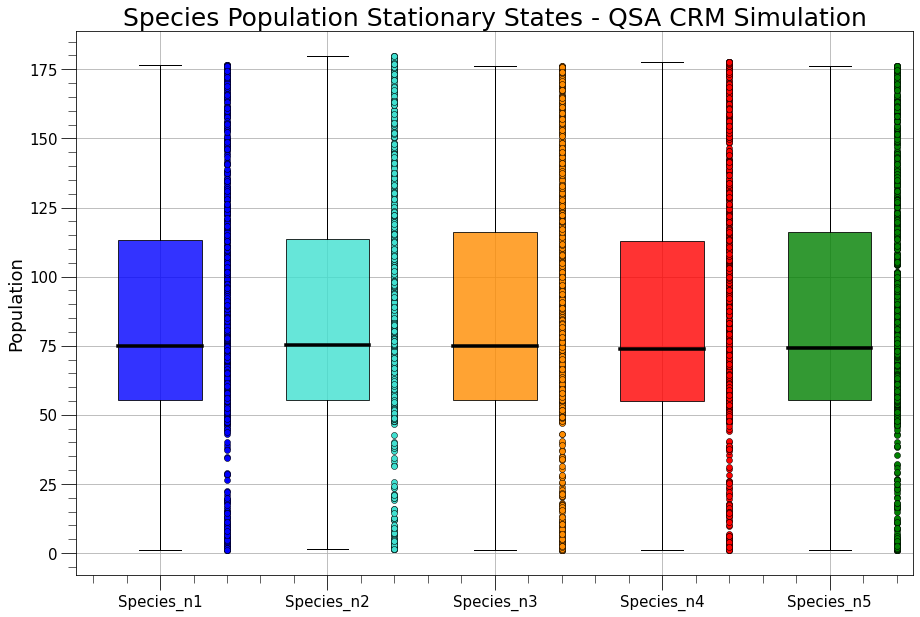

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

colors = ['blue', 'turquoise', 'darkorange', 'red', 'green']

bp = ax.boxplot(statistics_species, labels = [f'Species_n{i+1}' for i in range(m)], patch_artist=True,
                medianprops = dict(color="black",linewidth=3.5), showfliers = True)

for i, patch in enumerate(bp['boxes']):
        patch.set(facecolor=colors[i], alpha=0.8, zorder=2)
        ax.scatter(x = (i + 1.4) * np.ones(statistics_species.shape[0]), y = statistics_species[:, i], color = colors[i], 
                   zorder=3, edgecolor = 'black', linewidths=0.5)

ax.minorticks_on()
ax.set_title('Species Population Stationary States - QSA CRM Simulation', fontsize = 25)
ax.set_ylabel('Population', fontsize = 18)

ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.minorticks_on()


ax.grid(zorder = 1)
plt.show()


---

Does the quasi-stationary approximation work if if $w=0.1$? Why?

In [27]:
omega = 0.1

In [28]:
def QSA_system(y, t, m, alpha, delta, omega):
    return_list = []
    n_vec = np.array(y)
    
    omega_vec = np.ones(m) * omega
    
    
    for i in range(m):
        n = y[i]
        dn_dt = n * ( np.sum(alpha[i, :] * (1 - (1/omega_vec[i])*(n_vec @ alpha))) - delta)
        return_list.append(dn_dt)
    
    return return_list

t = np.linspace(0, 200, 300)   # time_domain

solution_qsa = odeint(QSA_system, n0, t, args=(m, metabolic_strategies, death_rate, omega))

resources_qsa = 1 - 1/omega * np.array(solution_qsa[::np.newaxis]).dot(metabolic_strategies)


In [29]:
full_solution = odeint(system, y0, t, args=(m, p, metabolic_strategies, death_rate, omega))

In [30]:
arr_spec = np.vstack((t, np.array(solution_qsa).T , np.array(full_solution[:,:m]).T)).T
df_spec = pd.DataFrame(arr_spec, columns = ['t[s]', 'Consumer_n1', 'Consumer_n2', 'Consumer_n3', 'Consumer_n4','Consumer_n5', 
                                            'Full_Consumer_n1', 'Full_Consumer_n2', 'Full_Consumer_n3', 'Full_Consumer_n4','Full_Consumer_n5']) 

arr_res = np.vstack((t, np.array(resources_qsa).T, np.array(full_solution[:,m:]).T)).T
df_res = pd.DataFrame(arr_res, columns = ['t[s]', 'Resource_c1', 'Resource_c2', 'Resource_c3', 'Resource_c4','Resource_c5', 'Full_Resource_c1', 'Full_Resource_c2', 'Full_Resource_c3', 'Full_Resource_c4','Full_Resource_c5']) 




In [31]:
fig = px.line( df_spec, x='t[s]', 
              title="Consumer Resource Model - Biotic - with 5 species and 5 Resources <br><sup> QSA Species Evolution vs. Full Solutions ---</sup>", 
              y = ['t[s]', 'Consumer_n1', 'Consumer_n2', 'Consumer_n3', 'Consumer_n4','Consumer_n5',
                    'Full_Consumer_n1', 'Full_Consumer_n2', 'Full_Consumer_n3', 'Full_Consumer_n4','Full_Consumer_n5'],
              labels={'value':'Dynamics', 'variable':'', 't[s]':'t [s]'},
              height=600, width=1200)

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Consumer_n{i}'}, line = {'width':3.5})

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Full_Consumer_n{i}'}, line = {'width':4, 'dash':'dash'})

fig.update_layout(font=dict(size=20))
fig.show()

In [34]:
fig = px.line( df_res, x='t[s]', 
              title="Consumer Resource Model - Biotic - with 5 species and 5 Resources <br><sup> QSA Resource Evolution vs. Full Solutions ---</sup>", 
              y = ['t[s]', 'Resource_c1', 'Resource_c2', 'Resource_c3', 'Resource_c4','Resource_c5',
                    'Full_Resource_c1', 'Full_Resource_c2', 'Full_Resource_c3', 'Full_Resource_c4','Full_Resource_c5'],
              labels={'value':'Dynamics', 'variable':'', 't[s]':'t [s]'},
              height=600, width=1200)

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Resource_c{i}'}, line = {'width':3.5})

for i in range (1,6):
      fig.update_traces(selector = {'name': f'Full_Resource_c{i}'}, line = {'width':4, 'dash':'dash'})

fig.update_layout(font=dict(size=20), xaxis_range = [-2, 100], yaxis_range = [-5, 5])
fig.show()

As expected the Quasi Stationary Approximation does not work if $\omega=0.1$ because the time scale of the resources dynamics is much smaller than the time scale of the species dynamics.

The parameter $\omega$ represents the supply rate of the resources, that is the rate at which the resources are produced. If $\omega$ is small, the resources will be produced at a slower rate and the resources will not be able to reach a new equilibrium before the next change of the population.